In [113]:
import numpy as np
import matplotlib.pyplot as plt



X = np.load("../Data_and_Results/Inputs_YSO_EG_Stars.npy")
Y = np.load("../Data_and_Results/Targets_YSO_EG_Stars.npy")

In [114]:
YSO = np.where(Y==0)
EG = np.where(Y==1)
Stars = np.where(Y==2)

X_bands = X.transpose()
X_bands = X_bands[[0,2,4,6]]
X_bands = X_bands.transpose()


X_errs = X.transpose()
X_errs = X_errs[[1,3,5,7]]
X_errs = X_errs.transpose()

X_errs.shape

(26813, 4)

(7.23645, 16.02655)


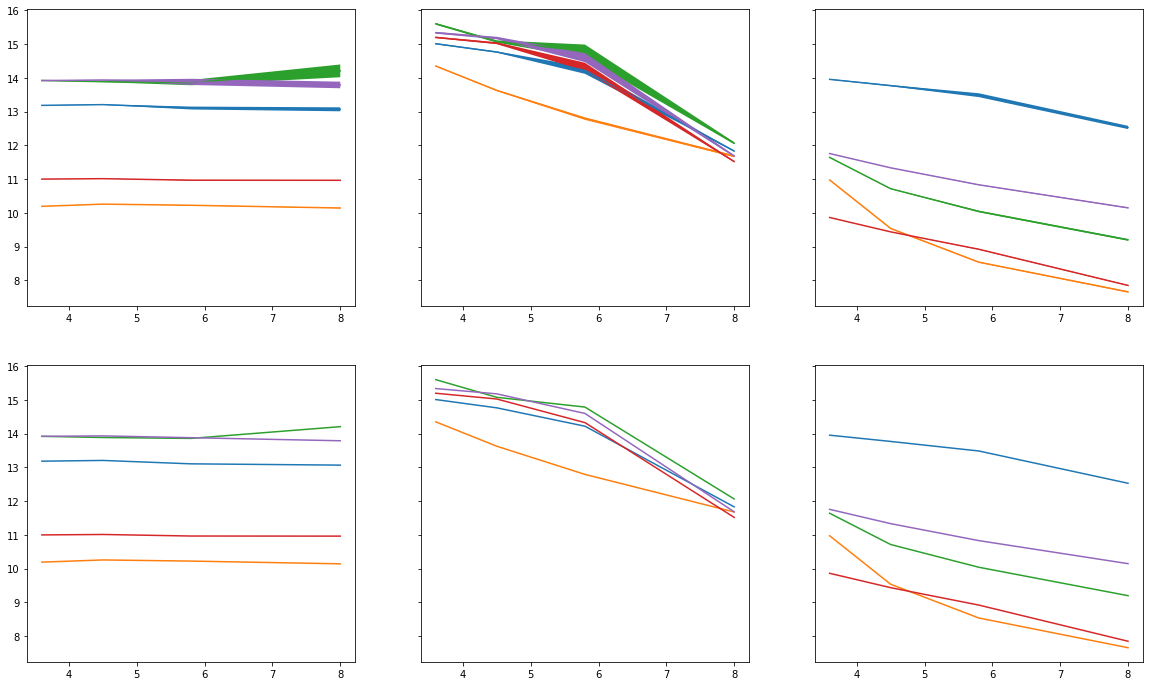

In [156]:
fig, ax = plt.subplots(2,3,sharey=True,figsize=(20,12))
# ax[0]
for i, x in enumerate(X_bands[Stars[0]]):
    xerr = X_errs[Stars[0]]
    if i< 5:
        ymin = x-xerr[i]
        ymax = x+xerr[i]
        ax[0][0].plot([3.6,4.5,5.8,8.0],x,'-')
        ax[0][0].fill_between([3.6,4.5,5.8,8.0], ymin, ymax, label='error band')


        ax[1][0].plot([3.6,4.5,5.8,8.0],x,'-')

# ax[0].title("Stars errors")


for i, x in enumerate(X_bands[EG[0]]):
    xerr = X_errs[EG[0]]
    if i< 5:
        ymin = x-xerr[i]
        ymax = x+xerr[i]
        ax[0][1].plot([3.6,4.5,5.8,8.0],x,'-')
        ax[0][1].fill_between([3.6,4.5,5.8,8.0], ymin, ymax, label='error band')


        ax[1][1].plot([3.6,4.5,5.8,8.0],x,'-')

# ax[1].title("EG errors")


for i, x in enumerate(X_bands[YSO[0]]):
    xerr = X_errs[YSO[0]]
    if i< 5:
        ymin = x-xerr[i]
        ymax = x+xerr[i]
        ax[0][2].plot([3.6,4.5,5.8,8.0],x,'-')
        ax[0][2].fill_between([3.6,4.5,5.8,8.0], ymin, ymax, label='error band')


        ax[1][2].plot([3.6,4.5,5.8,8.0],x,'-')

# ax[2].title("YSO errors")
print(plt.ylim())

In [165]:

for i, x in enumerate(X_bands):
    fig, ax = plt.subplots(1,1,figsize=(4,4))
    ax.set_ylim(7,16)
    ymin = x-X_errs[i]
    ymax = x+X_errs[i]
    plt.plot([3.6,4.5,5.8,8.0],x,'-')
    plt.fill_between([3.6,4.5,5.8,8.0], ymin, ymax)
    plt.savefig(f"../../../SEDs/SED_ERR_{i}.png",dpi=72)
    plt.close()


In [161]:

from sklearn.utils import shuffle
import random
amounts_train = [3073,2034,10000]

class_indices = []
for i in np.unique(Y):
    class_indices.append(np.where(Y==i)[0])

# These arrays will hold the indices of the shuffled indices
train_indices = []

#Randomly choose amounts_train and amounts_valid amounts from these three classes
for i, type_in in enumerate(class_indices):
    # Shuffle the array of indices 
    type_in = shuffle(type_in,random_state=random.randint(0,1000))
    
    # Take the first amount of this shuffled set as the training set
    train_indices = np.append(train_indices,type_in[0:amounts_train[i]]).astype(int)

X = X[train_indices]
Y = Y[train_indices]

In [163]:
YSO = np.where(Y==0)
EG = np.where(Y==1)
Stars = np.where(Y==2)

X_bands = X.transpose()
X_bands = X_bands[[0,2,4,6]]
X_bands = X_bands.transpose()


X_errs = X.transpose()
X_errs = X_errs[[1,3,5,7]]
X_errs = X_errs.transpose()

X_errs.shape

(15022, 4)